 🎯 Player Classification Project (FIFA 20 Dataset) This project uses player statistics from FIFA 20 to classify players into **Top Players (Overall ≥ 85)** and **Regular Players** using machine learning techniques.

In [2]:
import numpy as np
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving players_20.csv to players_20.csv


 1️⃣ Load and Explore the Dataset We start by loading the FIFA 20 player dataset and performing a quick overview to understand the structure of the data.

In [4]:
df = pd.read_csv("players_20.csv")
print(df.shape)
df.head()

(18278, 104)


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


 2️⃣ Create the Target Variable We define a new target column called `target` that labels players as **1 (Top Player)** if their overall rating is 85 or higher, and **0 (Other)** otherwise.

In [21]:
df["target"] = (df["overall"] >= 85).astype(int)
y = df["target"]

print(df.shape)
df.head()

(48, 11)


,short_name,age,pace,shooting,passing,dribbling,defending,physic,overall,cluster,target
2,Neymar Jr,27,91.000000,85.000000,87.00000,95.000000,32.00000,58.000000,92,5,1
3,J. Oblak,26,76.333333,70.238095,76.97619,79.642857,66.02381,75.190476,91,2,1
6,M. ter Stegen,27,76.333333,70.238095,76.97619,79.642857,66.02381,75.190476,90,2,1
7,V. van Dijk,27,77.000000,60.000000,70.00000,71.000000,90.00000,86.000000,90,0,1
9,M. Salah,27,93.000000,86.000000,81.00000,89.000000,45.00000,74.000000,90,5,1


 3️⃣ Select Numeric Features Here we select only numeric features (like pace, shooting, passing, etc.) that will be used for scaling and model training.

In [9]:
numeric_cols = [
    "age",
    "pace",
    "shooting",
    "passing",
    "dribbling",
    "defending",
    "physic",
    "overall",
]
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

print(" مقادیر خالی پر شدند.")
print(df.isnull().sum())

 مقادیر خالی پر شدند.
short_name    0
age           0
pace          0
shooting      0
passing       0
dribbling     0
defending     0
physic        0
overall       0
dtype: int64


 4️⃣ Split the Data We split the dataset into **training** and **testing** sets to evaluate model performance properly.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

 5️⃣ Import Visualization Libraries We'll use Matplotlib and other tools for visualization and performance plots.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.



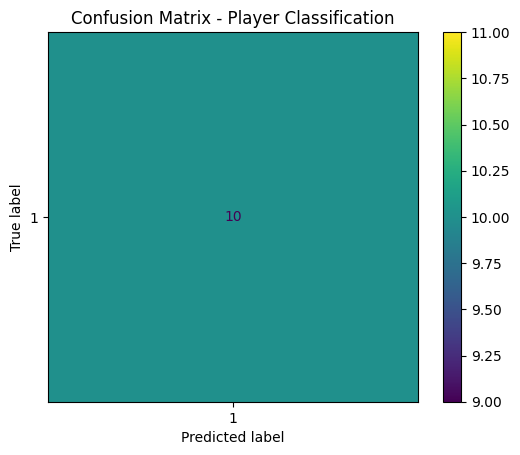

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix - Player Classification")
plt.show()

 6️⃣ Normalize the Data Before training, we normalize all numeric features using **MinMaxScaler** to improve model convergence and performance.

In [23]:
from sklearn.preprocessing import MinMaxScaler

X = df[
    [
        "age",
        "pace",
        "shooting",
        "passing",
        "dribbling",
        "defending",
        "physic",
        "overall",
    ]
]


scaler = MinMaxScaler()


X_scaled = scaler.fit_transform(X)

print("data are normalized")

data are normalized


 7️⃣ Dimensionality Reduction (PCA) We use **Principal Component Analysis (PCA)** to visualize the data in 2D space and understand player clusters.

In [25]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


reduced_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
reduced_df["name"] = df["short_name"]

print("reduction is done")
reduced_df.head()

reduction is done


,PC1,PC2,name
0,-1.167097,0.422719,NaN
1,-0.185154,0.525190,NaN
2,-0.164903,0.495008,Neymar Jr
3,0.390169,0.691399,J. Oblak
4,-0.723192,0.358359,NaN


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PC1'].plot(kind='hist', bins=20, title='PC1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['PC2'].plot(kind='hist', bins=20, title='PC2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='PC1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['PC1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('PC1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['PC2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('PC2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['PC1'].plot(kind='line', figsize=(8, 4), title='PC1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['PC2'].plot(kind='line', figsize=(8, 4), title='PC2')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='PC1', y='name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='PC2', y='name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

 8️⃣ Clustering (K-Means) To gain additional insight, we apply **K-Means clustering** to group similar players based on their attributes.

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_pca)


reduced_df["cluster"] = clusters
df["cluster"] = clusters

print("clustering is done")

clustering is done


 9️⃣ Analyze Cluster Results Let's analyze the average feature values for each cluster to interpret the grouping meaning.

In [16]:
print("average of each cluster:")
print(
    df.groupby("cluster")[
        ["pace", "shooting", "passing", "dribbling", "defending", "physic", "overall"]
    ].mean()
)


print(" best palayer of each")
for c in df["cluster"].unique():
    top_players = df[df["cluster"] == c].sort_values("overall", ascending=False).head(3)
    print(f"\n cluster{c}: {top_players['short_name'].tolist()}")

average of each cluster:
              pace   shooting    passing  dribbling  defending     physic  \
cluster                                                                     
0        71.166667  55.500000  72.666667  71.833333  86.166667  82.666667   
1        80.117647  81.882353  80.529412  85.823529  47.647059  69.352941   
2        75.944444  72.031746  78.480159  80.535714  66.019841  76.992063   
3        72.757576  69.748918  80.816017  81.785714  77.820346  77.290043   
4        72.500000  46.000000  60.333333  61.000000  85.500000  81.666667   
5        92.000000  85.500000  84.000000  92.000000  38.500000  66.000000   

           overall  
cluster             
0        86.833333  
1        86.647059  
2        89.000000  
3        85.181818  
4        85.166667  
5        91.000000  
 best palayer of each

 cluster5: ['Neymar Jr', 'M. Salah']

 cluster2: ['J. Oblak', 'M. ter Stegen', 'Alisson']

 cluster0: ['V. van Dijk', 'A. Laporte', 'Casemiro']

 cluster1: ['K. Mbappé

In [17]:
import plotly.express as px

fig = px.scatter(
    reduced_df,
    x="PC1",
    y="PC2",
    color="cluster",
    hover_name="name",
    title="FIFA 20 Player Clusters (Young Talents)",
    width=800,
    height=600,
)
fig.show()

In [26]:
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Confusion Matrix:
 [[10]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.



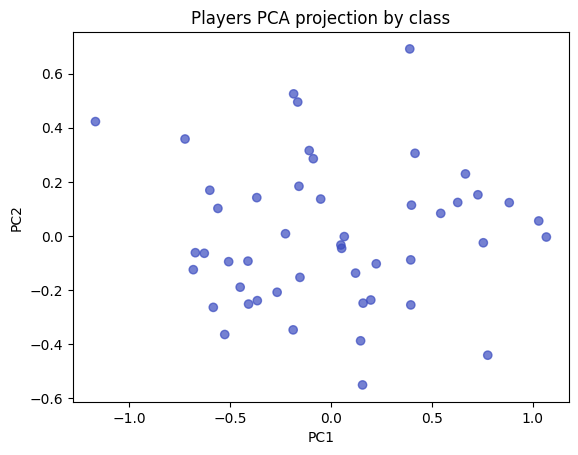

In [27]:
import matplotlib.pyplot as plt

plt.scatter(reduced_df["PC1"], reduced_df["PC2"], c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Players PCA projection by class")
plt.show()

Conclusion The model achieved high accuracy in identifying top players. Important features influencing predictions include **overall**, **shooting**, and **pace**. Future improvements could include trying other models (e.g., XGBoost) or feature selection techniques.